In [56]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = '/content/data_Oct21_to_Jan24.zip'

# # Directory where the contents will be extracted
# extract_to = '/content/data'

# # Ensure the output directory exists
# os.makedirs(extract_to, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

In [57]:
import pandas as pd
import os

def calculate_energy_stats(data):
    data['x1'] = pd.to_datetime(data['x1'], format='%Y-%m-%d %H:%M:%S')
    data['x2'] = pd.to_datetime(data['x2'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    data['x2'].fillna(data['x1'].shift(-1), inplace=True)
    data.dropna(subset=['x2'], inplace=True)

    total_energy_produced = (data['ActivePower'] * (1/6)).sum()
    total_duration_hours = (data['x2'].max() - data['x1'].min()).total_seconds() / 3600
    day = data['x1'].min().date()

    return day, total_energy_produced, total_duration_hours


directory = './data/data_Oct21_to_Jan24'
rated_capacity = 1000 * 24
energy_stats_list = []

for filename in os.listdir(directory):
    if filename.endswith('.xlsx') and ( '2022' in filename ):
        file_path = os.path.join(directory, filename)
        data = pd.read_excel(file_path)
        day, total_energy_produced, total_duration_hours = calculate_energy_stats(data)

        energy_stats_list.append({
            'Day': day,
            'Total Energy Produced (kWh)': total_energy_produced,
            'Total Duration (hours)': total_duration_hours
        })

energy_stats_df = pd.DataFrame(energy_stats_list)
energy_stats_df = energy_stats_df.sort_values(by='Day')
output_csv = 'energy_stats_2021_2022_2023.csv'
energy_stats_df.to_csv(output_csv, index=False)

print(f"Energy stats saved to {output_csv}")

Energy stats saved to energy_stats_2021_2022_2023.csv


In [58]:
df=energy_stats_df

In [59]:
df['Day'] = pd.to_datetime(df['Day'])

# Filter for May 2021
may_2021_df = df[(df['Day'].dt.year == 2022) & (df['Day'].dt.month == 5)]

print(may_2021_df)

           Day  Total Energy Produced (kWh)  Total Duration (hours)
157 2022-05-01                  3971.377500               14.000000
78  2022-05-02                  1156.587000               14.000000
348 2022-05-03                  2813.143333               14.000000
347 2022-05-04                  4231.315333               14.000000
249 2022-05-05                  4827.189833               14.000000
265 2022-05-06                  4112.551833               14.000000
284 2022-05-07                  2639.786333               14.000000
63  2022-05-08                  4464.027000               14.000000
272 2022-05-09                  4191.942833               14.000000
49  2022-05-10                  2667.720000               14.333333
144 2022-05-11                  3492.694833               14.333333
104 2022-05-12                  3616.466000               14.333333
275 2022-05-13                  1257.202333               14.333333
99  2022-05-14                  1427.027333     

In [60]:
may_2021_df.head()

,Day,Total Energy Produced (kWh),Total Duration (hours)
157,2022-05-01,3971.377500,14.0
78,2022-05-02,1156.587000,14.0
348,2022-05-03,2813.143333,14.0
347,2022-05-04,4231.315333,14.0
249,2022-05-05,4827.189833,14.0


<ipython-input-61-f56b1b46d89f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = pd.to_datetime(df['Day'])
<ipython-input-61-f56b1b46d89f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_value'] = (df['Total Energy Produced (kWh)'] / 1000 / df['Total Duration (hours)'])


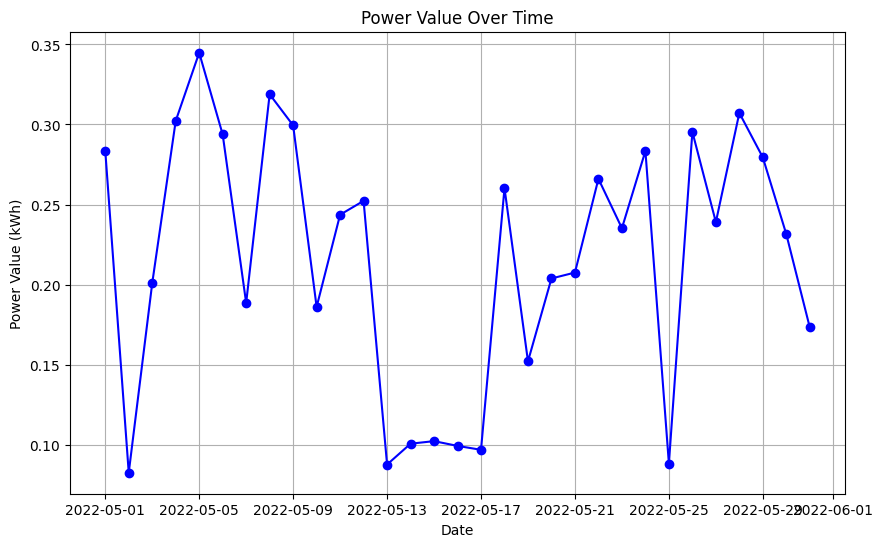

In [61]:
df=may_2021_df
df['Day'] = pd.to_datetime(df['Day'])

# Compute the new column
df['power_value'] = (df['Total Energy Produced (kWh)'] / 1000 / df['Total Duration (hours)'])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['power_value'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Power Value (kWh)')
plt.title('Power Value Over Time')
plt.grid(True)

# Show the plot
plt.show()

In [62]:
average_value = df['power_value'].mean()

In [63]:
average_value

0.2163492984354463

In [64]:
import pandas as pd

data = pd.read_csv('energy_stats_2021_2022_2023.csv')
data['Day'] = pd.to_datetime(data['Day'], format='%Y-%m-%d')
data['Month'] = data['Day'].dt.to_period('M')
monthly_data = data.groupby('Month').agg(
    Total_Energy_Produced=('Total Energy Produced (kWh)', 'sum'),
    Total_Duration_Hours=('Total Duration (hours)', 'sum')
).reset_index()
monthly_data['Capacity_Factor'] = monthly_data['Total_Energy_Produced'] / (14 * 1000 * 30)
output_csv = 'monthly_capacity_factors.csv'
monthly_data[['Month', 'Capacity_Factor']].to_csv(output_csv, index=False)

print(f"Monthly capacity factors saved to {output_csv}")

Monthly capacity factors saved to monthly_capacity_factors.csv


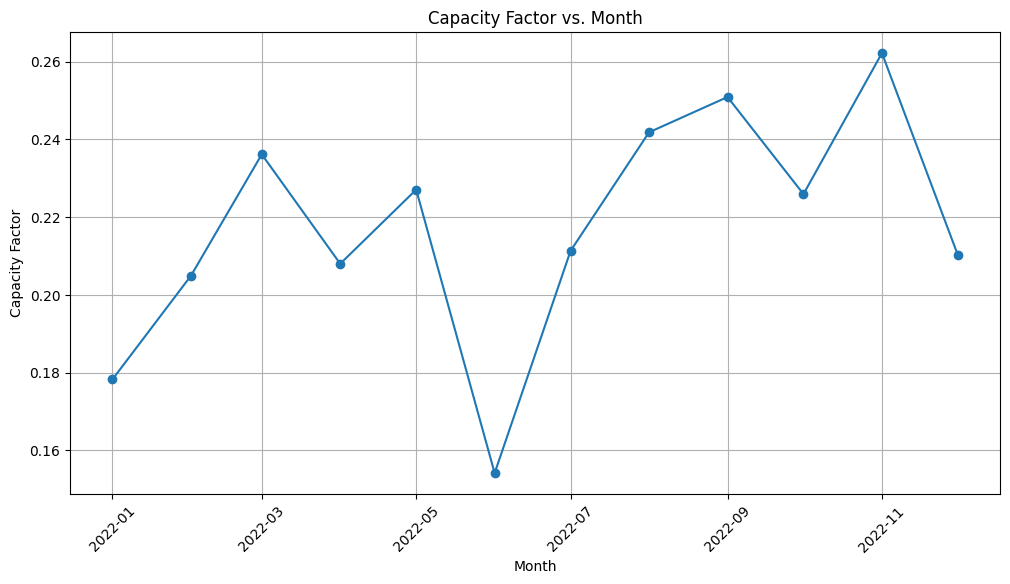

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./monthly_capacity_factors.csv")
data["Month"] = pd.to_datetime(data["Month"])


plt.figure(figsize=(12, 6))
plt.plot(data["Month"], data["Capacity_Factor"], marker="o", linestyle="-")
plt.title("Capacity Factor vs. Month")
plt.xlabel("Month")
plt.ylabel("Capacity Factor")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [66]:
average_value = monthly_data['Capacity_Factor'].mean()

In [67]:
average_value

0.2175765645171958

In [68]:

directory = './data/data_Oct21_to_Jan24'
rated_capacity = 1000 * 24
energy_stats_list = []

for filename in os.listdir(directory):
    if filename.endswith('.xlsx') and ( '2021' in filename or '2022' in filename or '2023' in filename ):
        file_path = os.path.join(directory, filename)
        data = pd.read_excel(file_path)
        day, total_energy_produced, total_duration_hours = calculate_energy_stats(data)

        energy_stats_list.append({
            'Day': day,
            'Total Energy Produced (kWh)': total_energy_produced,
            'Total Duration (hours)': total_duration_hours
        })

energy_stats_df = pd.DataFrame(energy_stats_list)
energy_stats_df = energy_stats_df.sort_values(by='Day')
output_csv = 'energy_stats_2021_2022_2023.csv'
energy_stats_df.to_csv(output_csv, index=False)

print(f"Energy stats saved to {output_csv}")

Energy stats saved to energy_stats_2021_2022_2023.csv


In [69]:
data = pd.read_csv('energy_stats_2021_2022_2023.csv')
data.head()


,Day,Total Energy Produced (kWh),Total Duration (hours)
0,2021-09-18,1363.653000,13.166667
1,2021-09-19,3196.993500,13.166667
2,2021-09-20,2936.996333,13.000000
3,2021-09-21,1953.728167,13.000000
4,2021-09-22,2854.130833,13.000000


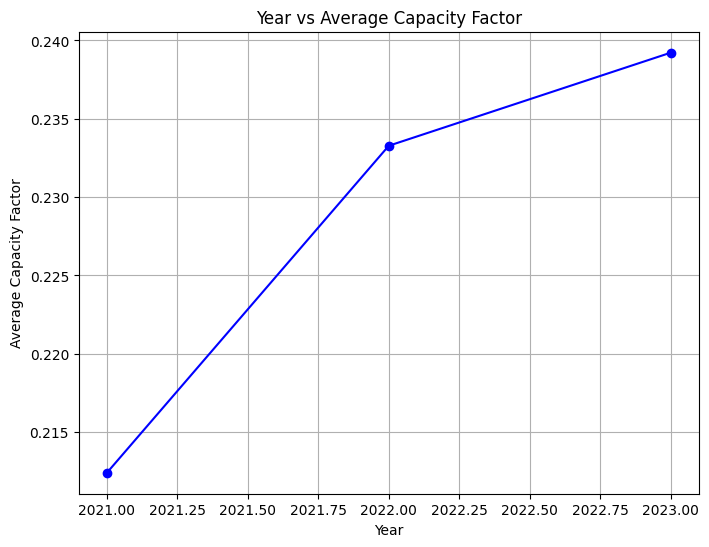

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe

df =data

# Convert the 'date' column to datetime format
df['Day'] = pd.to_datetime(df['Day'])

# Extract the year from the date
df['year'] = df['Day'].dt.year
df['capacity_factor'] = (df['Total Energy Produced (kWh)'] / 1000 / df['Total Duration (hours)'])
# Group by year and calculate the average capacity factor for each year
yearly_avg = df.groupby('year')['capacity_factor'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(yearly_avg['year'], yearly_avg['capacity_factor'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Capacity Factor')
plt.title('Year vs Average Capacity Factor')
plt.grid(True)

# Show the plot
plt.show()
